### <center> Umjetna inteligencija - prvi projektni zadatak</center>
## <center> Vuk, koza i kupus </center>
### <center> Doris Đivanović </center>

### Opis igre / problema

Farmer se nalazi s jedne strane rijeke, zajedno s jednim vukom, jednom kozom i jednom košarom kupusa. Farmer želi prijeći rijeku, tj. doći na drugu stranu, te na tu stranu prenijeti i vuka i kozu i kupus. Rijeku prelazi brodom. U brodu pri jednom prijelazu može biti samo farmer ili farmer s još samo jednim od svojih "dobara", dakle samo vukom, samo kozom ili samo kupusom. Ukoliko se u nekom trenutku vuk i koza nađu na istoj strani rijeke bez prisutstva farmera, vuk će pojesti kozu i igra završava (neuspješno). Također, ukoliko se u nekom trenutku koza i kupus nađu na istoj strani rijeke bez prisutstva farmera, koza će pojesti kupus i igra nuspješno završava. Cilj je uspješno završiti igru, tj. prevesti farmera, vuka, kozu i kupus s jedne na drugu stranu rijeke bez da išta bude pojedeno.

### Prostor stanja

U smislu pretraživanja prostora stanja, riješiti ovu igru / problem znači **pronaći niz stanja od početnog do ciljnog stanja**. U tu svrhu, moramo odrediti prostor stanja. Za prostor stanja potreban nam je skup svih mogućih stanja, ali i skup svih mogućih prijelaza između tih stanja. Također, treba izdvojiti početno i ciljno stanje.


### Stanja

Jedno stanje odredit ću položajem svakog od četiriju "aktera" igre između dvaju uzastopnih prijelaza rijeke brodom, dakle onda kada su brod i farmer na nekoj strani rijeke i tu miruju. Položaji aktera su lijeva ili desna strana rijeke. Odredit ću da igra započinje na lijevoj strani rijeke, tj. da je početno stanje stanje kada su sva četiri aktera na lijevoj strani rijeke. Dakle, završno stanje će onda biti stanje kada su sva četiri aktera na desnoj strani rijeke.

Čini mi se prirodnim da ovako definirano **stanje igre modeliram kao uređenu četvorku**:
<br><br>
$$(\text{f}, \ \text{w}, \ \text{g}, \ \text{c}) \ \ ,  \quad    \text{f}, \ \text{w}, \ \text{g}, \ \text{c} \ \in \  \{\text{L}, \ \text{D}\}$$
gdje je:
<ul>
    <li>f -  položaj farmera (eng. farmer)</li>
    <li>w - položaj vuka (eng. wolf)</li> 
    <li>g - položaj koze (eng. goat)</li> 
    <li>c - položaj kupusa (eng. cabbage)</li>
    <li>L - lijeva strana rijeke</li>
    <li>D - desna strana rijeke</li>
</ul> 

**Napomena.** Radi jednostavnije implementacije, lijevu i desnu stranu rijeke, umjesto s L i D, modelirat ću s 0 i 1. Dakle:
<ul>
    <li>lijeva strana rijeke - 0</li>
    <li>desna strana rijeke - 1</li>
</ul>

U skladu s gore opisanim, imat ćemo sljedeće:
<ul>
    <li><b>(0, 0, 0, 0) - početno stanje</b></li>
    <li><b>(1, 1, 1, 1) - završno stanje</b></li>
    <li><b>npr.</b> (1, 0, 1, 1) - farmer, koza i kupus su na desnoj, vuk je na lijevoj strani rijeke</li>
</ul>


### Nedozvoljena stanja

Uočimo da ovako modeliran prostor stanja ima
<br>
$$(\text{Card}\{\text{L}, \ \text{D}\})^4 = (\text{Card}\{\text{0}, \ \text{1}\})^4 = 2^4 = 16$$
stanja. 
<br>
Međutim, moramo paziti da <b>isključimo tzv. nedozvoljena stanja</b>, tj. stanja koja bi, po pravilima igre, kada bi se u njih došlo, izazvala game over.
Uočimo da su, u terminima gornjeg modela, to stanja za koja vrijedi:
<br>
<br>
    $$(\text{f}, \ \text{w}, \ \text{g}, \ \text{c}) \ , \qquad  (\text{w} \ = \ \text{g} \ \ \text{ili} \ \ \text{g} \ = \ \text{c})  \ \ \text{i}  \ \ \text{f} \ \neq \ \text{g}$$
(uočimo da u ovo spada i $\text{w} \ = \ \text{g} \ = \ \text{c} \ \ \text{i}  \ \ \text{f} \ \neq \ \text{g})$.

Iz samog gornjeg uvjeta, direktno vidimo da skup nedozvoljenih stanja ima $6$ elemenata (za svaku od dviju različitih fiksiranih vrijednosti za $\text{f}$, imamo tri slučaja: $\text{w} \ = \ \text{g} \ \ \text{i} \ \ \text{g} \ \neq \ \text{c},\ \ \text{w} \ \neq \
\text{g} \ \ \text{i} \ \ \text{g} \ =  \ \text{c}, \ \ \text{te} \ \  \text{w} \ =  \ \text{g} \ = \ \text{c}$).

Konačno, zaključujemo da **prostor stanja ima $10$ različitih stanja**.

    

### Mogući prijelazi između stanja

Po pravilima igre, uočimo da moguće prijelaze između stanja možemo podijeliti u 4 skupine:
<ol>
    <li>Farmer prelazi sam - uočimo da je ovo <b>uvijek moguće</b></li>
    <li>Farmer prelazi s vukom - moguće samo ako se farmer i vuk nalaze na istoj strani</li>
    <li>Farmer prelazi s kozom - moguće samo ako se farmer i koza nalaze na istoj strani</li>
    <li>Farmer prelazi s kupusom - moguće samo ako se farmer i kupus nalaze na istoj strani</li>
</ol>  

#### Napomena 1.
Uočimo da je za svaki mogući prijelaz moguć i njemu <b>inverzni</b> prijelaz. <b>Ovo nam kazuje da su mogući ciklusi</b>, od transpozicija do beskonačnih ciklusa.
<br>
#### Napomena 2.
Uočimo da prijelaz <b>nije moguć ukoliko se tim prijelazom dolazi u nedozvoljeno stanje</b>.

### Graf prostora stanja

Sada ću gore definirani prostor stanja pretvoriti u graf, tj. sva moguća stanja pretvorit ću u vrhove, a sve moguće prijelaze u bridove između odgovarajućih stanja. Graf je **usmjeren** jer nije svejedno koje od dvaju stanja pri prijelazu je početno, a koje je završno, tj. koji je vrh početak, a koji je vrh kraj odgovarajućeg brida.

### Graf prostora stanja kao rječnik

Graf ću implementirati kao **rječnik**, tj. python strukturu podataka **defaultdict**. Ključevi će biti stanja, a vrijednosti za ključeve će biti liste svih susjeda tog stanja. Time je jedan određeni brid reprezentiran kao uređeni par određenog ključa i jednog određenog elementa iz njemu pridružene liste.

Korištenjem strukture defaultdict mogu odmah naznačiti da će vrijednosti ključeva biti tipa **list**. Vrijednostima pojedinog ključa u rječniku, dakle odgovarajućoj listi, pristupam **operatorom [ ]**. Nove elemente u list dodajem **na kraj** liste metodom **append**.

Budući da sam stanja reprezentirala kao uređene četvorke, u pythonu ću ih implementirati upravo kao **tuple** od 4 elementa.

**U skladu sa svime dosad rečenim**, napisala sam sljedeći kod:

In [1]:
from collections import defaultdict 

In [2]:
def generiraj_graf():

    Graf = defaultdict(list)

    #lijeva strana - 0, desna strana - 1
    #f - farmer, w - vuk, g - koza, c - kupus
    for f in [0, 1]:
        for w in [0, 1]:
            for g in [0, 1]:
                for c in [0, 1]:
                
                    if not problem(f, w, g, c):
                        
                        #farmer prelazi sam      # x = 0 --> abs(x - 1) = 1, x = 1 --> abs(x - 1) = 0
                        if not problem(abs(f - 1), w, g, c):
                            Graf[(f, w, g, c)].append((abs(f - 1), w, g, c))

                        #farmer prelazi s vukom (samo ako se nalaze na istoj strani)
                        if(f == w):
                            if not problem(abs(f - 1), abs(w - 1), g, c):
                                Graf[(f, w, g, c)].append((abs(f - 1), abs(w - 1), g, c))

                        #farmer prelazi s kozom (samo ako se nalaze na istoj strani)
                        if(f == g):
                            if not problem(abs(f - 1), w, abs(g - 1), c):
                                Graf[(f, w, g, c)].append((abs(f - 1), w, abs(g - 1), c))

                        #farmer prelazi s kupusom (samo ako se nalaze na istoj strani)
                        if(f == c):
                            if not problem(abs(f - 1), w, g, abs(c - 1)):
                                Graf[(f, w, g, c)].append((abs(f - 1), w, g, abs(c - 1)))

    return Graf

In [3]:
#slucajevi kada igra zavrsava, tj. nedozvoljena stanja
#vuk i koza, ili koza i kupus, ili sve troje zajedno, a da ih ne nadgleda farmer
def problem(f, w, g, c): 
    if (w == g or g == c) and f != g:
        return True
    else:
        return False

In [4]:
#Glavni program
Graf = generiraj_graf()

print("GRAF PROSTORA STANJA KAO DICTIONARY", end = "\n\n")

print(Graf)

GRAF PROSTORA STANJA KAO DICTIONARY

defaultdict(<class 'list'>, {(0, 0, 0, 0): [(1, 0, 1, 0)], (0, 0, 0, 1): [(1, 1, 0, 1), (1, 0, 1, 1)], (0, 0, 1, 0): [(1, 0, 1, 0), (1, 1, 1, 0), (1, 0, 1, 1)], (0, 1, 0, 0): [(1, 1, 1, 0), (1, 1, 0, 1)], (0, 1, 0, 1): [(1, 1, 0, 1), (1, 1, 1, 1)], (1, 0, 1, 0): [(0, 0, 1, 0), (0, 0, 0, 0)], (1, 0, 1, 1): [(0, 0, 0, 1), (0, 0, 1, 0)], (1, 1, 0, 1): [(0, 1, 0, 1), (0, 0, 0, 1), (0, 1, 0, 0)], (1, 1, 1, 0): [(0, 0, 1, 0), (0, 1, 0, 0)], (1, 1, 1, 1): [(0, 1, 0, 1)]})


### Vizualizacija grafa

U svrhu vizualizacije grafa, koristim gore generirani graf, tj. rječnik, i s pomoću njega generiram usmjereni graf iz biblioteke 
**graphviz** koristeći se **dot** jezikom.  Takav je graf moguće iscrtati.

Mislim da je iz samog koda lako iščitati što se događa.

In [5]:
#import networkx as nx
import graphviz as gv   #pip install graphviz    conda install python-graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
#import pydot   #pip install pydot

In [6]:
def oznaka(stanje):
    return '(' + str(stanje[0]) + ',' + str(stanje[1]) + ',' + str(stanje[2]) + ',' + str(stanje[3]) + ')'

def vizualizacija_grafa(Graf):
    
    dot = gv.Digraph()
    dot.attr(rankdir = 'LR')
    
    stanja = Graf.keys() 
    for stanje in stanja:
        dot.node(oznaka(stanje))
        for susjed in Graf[stanje]:
            dot.edge(oznaka(stanje), oznaka(susjed))
        
    return dot

GRAF PROSTORA STANJA



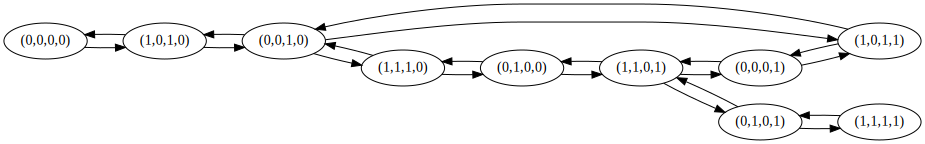

In [7]:
# Glavni program
print("GRAF PROSTORA STANJA", end = "\n\n")

vizualizacija_grafa(Graf)

### Što možemo uočiti gledajući u graf?

Samim pogledom na graf, vidimo da, **ako ne dozvoljavamo cikluse**, postoje točno dva različita puta od početnog stanja $(0, 0, 0, 0)$ do ciljnog stanja $(1, 1, 1, 1)$, dakle **postoje točno dva rješenja**:

#### 1. rješenje:
$(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 1, 1, 0) \rightarrow (0, 1, 0, 0) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$
 
#### 2. rješenje:
$(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 0, 1, 1) \rightarrow (0, 0, 0, 1) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$

Također, uočavamo da je **kod oba rješenja potrebno 7 prijelaza**.

### Algoritmi za pretraživanje

### Pretraživanje u širinu (BFS)

Najprije ću graf pretražiti algoritmom pretraživanja u širinu. Ovaj algoritam počinje od početnog stanja i, dok ne naiđe na ciljno stanje, za svako stanje, nakon provjere je li ono ciljno, najprije nekim redom provjerava sve njegove susjede, a zatim prelazi, istim redom kojim ih je provjeravao, na sve susjede tih susjeda. Dakle, lgoritam provjerava **razinu po razinu**, gdje se razina stanja određuje po broju predaka do početnog stanja.

Znamo da je ovaj algoritam **potpun**, dakle **sigurno će pronaći (neko) rješenje**. Ovaj algoritam je i **optimalan**, pa će **pronaći upravo optimalno rješenje**, u ovom slučaju **put najkraće duljine**.

Dakle, možemo zaključiti da će, budući da postoje **dva  (gore navedena)** rješenja koja su jednake duljine, algoritam pretraživanja u širinu **pronaći jedno od njih**.

#### Napomena 1.
Traženi redoslijed provjere razinu po razinu dobit ću tako što ću stanja koja se provjeravaju ubacivati u **first-in-first-out** strukturu. Počevši od početnog stanja, ako stanje nije ciljno, svi njegovi susjedi ubacuju se u red za provjeru, na kraj trenutnog reda. Stanje koje se provjerava izbacuje se s početka reda. Dakle, stanja se provjeravaju redom kojim su ubačena u red, u red su očito ubačena razinu po razinu, dakle uistinu se provjeravaju razinu po razinu.

#### Napomena 2. 
Ovaj algoritam je optimalan, tj. algoritam će naći nakraći put, pa nađeni put od početnog do ciljnog stanja sigurno neće imati cikluse. Međutim, možemo uočiti da bi se, dok algoritam ne dođe do ciljng stanja, zbog mogućih inverznih prijelaza **moglo dogoditi ponavljanje provjera nekih već provjerenih stanja**. Zato ću sva posjećena stanja pamtiti u nekom spremniku, ovdje listi.

In [8]:
def BFS(Graf, pocetak, cilj):
    
    #lista u kojoj pamtim posjećena stanja
    #da se spriječi ponavljanje stanja koje se provjeravaju
    visited = [] 
    
    queue   = []     
 
    visited.append(pocetak) 
    queue.append(pocetak)
    
    #rječnik kojim ću svakom posjećenom stanju pridružiti i time zapamtiti roditelja
    parent = {}
    
    #ovo je prvo sto će se ispisati
    print("Redoslijed obilaska stabla pretraživanja:", end = "\n") 
    
    while queue:

        stanje = queue.pop(0) 
        
        #ovim dobivam redoslijed obilaska - kod BFS razinu po razinu --> nije isti kao nađeni put
        print (stanje, end = " ") 
        
        if stanje == cilj:
            break
        
        for susjed in Graf[stanje]:
            if susjed not in visited:
                visited.append(susjed)
                queue.append(susjed)
                parent[susjed] = stanje
                
                
    path = rekonstruiraj_put(pocetak, cilj, parent)
    
    return path

In [9]:
def rekonstruiraj_put(pocetak, cilj, parent): 
    
    preth = cilj
    path = []
        
    while parent:
        path.insert(0, preth)
        if preth == pocetak:
            break
        preth = parent[preth]
    
    return path

### Pretraživanje u širinu - rješenje

In [10]:
%%time 
#Glavni program
print("PRETRAŽIVANJE U ŠIRINU:", end = "\n\n")

#pocetno stanje - (0, 0, 0, 0), ciljno stanje - (1, 1, 1, 1)
path1 = BFS(Graf, (0, 0, 0, 0), (1, 1, 1, 1))

print("\n\n Nađeni put: ")
print(path1)
print("\n Broj prijelaza preko rijeke: ")
print(len(path1) - 1)


PRETRAŽIVANJE U ŠIRINU:

Redoslijed obilaska stabla pretraživanja:
(0, 0, 0, 0) (1, 0, 1, 0) (0, 0, 1, 0) (1, 1, 1, 0) (1, 0, 1, 1) (0, 1, 0, 0) (0, 0, 0, 1) (1, 1, 0, 1) (0, 1, 0, 1) (1, 1, 1, 1) 

 Nađeni put: 
[(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 1, 1, 0), (0, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]

 Broj prijelaza preko rijeke: 
7
Wall time: 1 ms


In [11]:
def oznaci_put(Graf, path):
    
    dot = gv.Digraph()
    dot.attr(rankdir = 'LR')
    
    stanja = Graf.keys() 
    for stanje in stanja:
        if stanje in path:
            dot.node(oznaka(stanje), color = 'red') 
            i = path.index(stanje)
            for susjed in Graf[stanje]:
                if i < len(path) - 1 and susjed == path[i + 1]:
                    dot.edge(oznaka(stanje), oznaka(susjed), color = 'red')
                else:
                    dot.edge(oznaka(stanje), oznaka(susjed))
        else:
            dot.node(oznaka(stanje))
            for susjed in Graf[stanje]:
                dot.edge(oznaka(stanje), oznaka(susjed))
                
    return dot

PRETRAŽIVANJE U ŠIRINU - NAĐENI (OPTIMALAN) PUT:



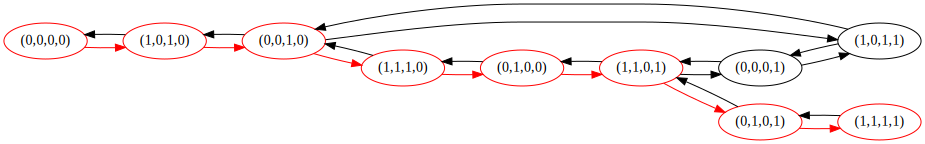

In [12]:
#Glavni program
print("PRETRAŽIVANJE U ŠIRINU - NAĐENI (OPTIMALAN) PUT:", end = "\n\n")

oznaci_put(Graf, path1)

### Vizualizacija tijeka igre - 1. mogućnost

In [13]:
def vizualizacija_tijeka_igre(path):
    
    #u ovoj petlji crtam jedno stanje i brod koji kreće iz tog stanja
    for k in range(0, len(path)):
        lijeva = ''
        desna = ''
        brod = ''
        #gledam situaciju na trenutnoj lijevoj strani rijeke, da bih nacrtala trenutnu lijevu i desnu stranu
        if path[k][0] == 0:
            lijeva = lijeva + 'F'
            desna = desna + ' '
        else:
            lijeva = lijeva + ' '
            desna = desna + 'F'
        if path[k][1] == 0:
            lijeva = lijeva + 'W'
            desna = desna + ' '
        else:
            lijeva = lijeva + ' '
            desna = desna + 'W'
        if path[k][2] == 0:
            lijeva = lijeva + 'G'
            desna = desna + ' '
        else:
            lijeva = lijeva + ' '
            desna = desna + 'G'
        if path[k][3] == 0:
            lijeva = lijeva + 'C'
            desna = desna + ' '
        else:
            lijeva = lijeva + ' '
            desna = desna + 'C'
            
        #ako postoji sljedeće stanje
        if k < len(path) - 1:
            #gledam razlike između trenutne i sljedeće lijeve strane, da bih nacrtala brod na rijeci
            if path[k + 1][0] != path[k][0]:
                brod = brod + 'F'
            if path[k + 1][1] != path[k][1]:
                brod = brod + 'W'
            elif path[k + 1][2] != path[k][2]:
                brod = brod + 'G'
            elif path[k + 1][3] != path[k][3]:
                brod = brod + 'C'
            else:
                brod = brod + ' '
        
        print(lijeva + "  ||      ||  " + desna) #crtam trenutno stanje
        
        #ako postoji sljedeće stanje
        if k < len(path) - 1:
            print("      ||  " + brod + "  ||      ") #crtam brod koji odlazi
                
        

In [14]:
#Glavni program
print("TIJEK IGRE", end = "\n\n")

vizualizacija_tijeka_igre(path1)

TIJEK IGRE

FWGC  ||      ||      
      ||  FG  ||      
 W C  ||      ||  F G 
      ||  F   ||      
FW C  ||      ||    G 
      ||  FW  ||      
   C  ||      ||  FWG 
      ||  FG  ||      
F GC  ||      ||   W  
      ||  FC  ||      
  G   ||      ||  FW C
      ||  F   ||      
F G   ||      ||   W C
      ||  FG  ||      
      ||      ||  FWGC


### BFS - komentari

Vidimo da je algoritam **BFS pronašao prvo od postojeća dva rješenja**:

1.   $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 1, 1, 0) \rightarrow (0, 1, 0, 0) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$

2.    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 0, 1, 1) \rightarrow (0, 0, 0, 1) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$

**Zašto je pronašao baš to rješenje?**

**Koje će od postojećih optimalnih rješenja algoritam BFS pronaći, ovisi o redoslijedu kojim provjerava listu neposjećenih susjeda nekog stanja**. U gornjoj implementaciji, for in-petlja listu iterira redom od prvog do zadnjeg elementa. Tim ih istim redom dodaje na kraj first-in-first-out strukture.  Dakle, **redoslijed kojim ovaj BFS provjerava susjede nekog stanja jednak je redoslijedu kojim su oni dodavani u listu pridruženu tom stanju u rječniku onda kada je graf, tj. rječnik kreiran**.

Gledajući funkciju generiraj_graf() mozemo uočiti da smo za svako stanje susjede dodavali ovim redom: susjed koji nastane prijelazom farmera samog, susjed koji nastane prijelazom farmera i vuka, susjed koji nastane prijelazom faremra i koze, te susjed koji nastane prijelazom farmera i kupusa. <br>
Uočavajući da se time sve tri ili samo neke od tri manje značajne komponente svakog stanja (vuk, koza, kupus) jedna po jedna redom od najviše značajne (vuk), pa manje značajne (koza) do najmanje značajne (kupus) mijenjaju i time daju jednog susjeda stanja, dobivamo neki uređaj liste susjeda koji je sličan leksikografskom, ali općenito nije leksikografski.
Isti zaključak možemo i jednostavno donijeti samim pogledom na gore ispisani dictionary koji predstavlja graf.

Ovaj gore izvedeni BFS koristi taj redoslijed susjeda.

Na temelju svega što je sada rečeno, možemo zaključiti da ukoliko bismo htjeli pokušati **algoritmom BFS dobiti drugo od gornja dva rješenja**, trebali bismo nekako promijeniti redoslijed susjeda u listama. Kako trenutni redoslijed nije leksikografski, možemo pokušati upravo **leksikografski sortirati liste**.

**Napomena.** Graf za ovaj problem očito je jednostavan. Iz samog pogleda na gore nacrtani graf, možemo vidjeti da počevši od početnog stanja, skoro svako stanje ima samo jednog susjeda (osim stanja iz kojega se došlo u njega samog, ali to je već posjećeno), dakle liste njihovih susjeda su **jednočlane**, pa ne moramo ni pričati o redoslijedu. Stanje $(0, 0, 1, 0)$ ima susjede $(1, 1, 1, 0)$ i $(1, 0, 1, 1)$, i oba se nalaze **na istoj razini** gledano od početnog stanja, dakle oba će za BFS biti neposjećena, pa će lista susjeda za stanje $(0, 0, 1, 0)$ biti dvočlana. Tu imamo prostor za samo dvije varijacije redoslijeda. Stanje $(1, 1, 0, 1)$ također ima dva susjeda, ali oni **nisu na istim razinama** gledano od početnog stanja, pa će za BFS jedno od njih biti već posjećeno, pa će lista neposjećenih susjeda opet biti jednočlana. Iz gore nacrtane slike grafa i nađenog puta, možemo vidjeti da ćemo ukoliko za stanje $(0, 0, 1, 0)$ prvo provjerimo susjeda $(1, 1, 1, 0)$ pretraživanjem u širinu doći do rješenja do kojeg je došao BFS kojeg smo upravo proveli (put označen crvenom bojom). Također, možemo vidjeti da ćemo ukoliko za stanje $(0, 0, 1, 0)$ prvo provjerimo susjeda $(1, 0, 1, 1)$ pretraživanjem u širinu doći do drugog rješenja. Ovaj drugi uređaj dvočlane liste očito je leksikografski.

### Pretraživanje u širinu - liste susjeda sortirane leksikografski

Liste u pythonu mogu se leksikografski sortirati metodom sort(), međutim ona mijenja originalnu listu. Budući da **ne želimo da se ovdje mijenja originalno konstruirani graf**, tj. da se mijenjaju liste za ključeve u rječniku, za svako stanje ćemo listu njegovih susjeda kopirati u pomoćnu listu i zatim na toj pomoćnoj listi primijeniti metodu sort(). Naravno, onda ćemo neposjećene susjede stanja uzimati prolazeći po toj sortiranoj listi, a ne po originalnoj.

In [15]:
def BFS_sorted(Graf, pocetak, cilj):
    
    visited = [] 
    queue   = []     
    
    visited.append(pocetak)
    queue.append(pocetak)
    
    parent = {}
    
    print("Redoslijed obilaska stabla pretraživanja:", end = "\n") 
    
    while queue:
        stanje = queue.pop(0) 
        print (stanje, end = " ") 
        
        if stanje == cilj:
            break
        
        susjedi = Graf[stanje].copy()    #kopiramo listu susjeda u pomoćnu
        susjedi.sort()                #leksikografski sortiramo pomoćnu listu
        
        for susjed in susjedi:       #neposjećene susjede uzimamo iz sortirane liste
            if susjed not in visited:
                visited.append(susjed)
                queue.append(susjed)
                parent[susjed] = stanje
                
            
    path = rekonstruiraj_put(pocetak, cilj, parent)
    return path


In [16]:
%%time

#Glavni program
print("PRETRAZIVANJE U ŠIRINU - LISTE SUSJEDA SORTIRANE LEKSIKOGRAFSKI", end ="\n\n")

path2 = BFS_sorted(Graf, (0,0,0,0), (1,1,1,1))

print("\n\n Nađeni put: ")
print(path2)
print("\n Broj prijelaza preko rijeke: ")
print(len(path2) - 1)

PRETRAZIVANJE U ŠIRINU - LISTE SUSJEDA SORTIRANE LEKSIKOGRAFSKI

Redoslijed obilaska stabla pretraživanja:
(0, 0, 0, 0) (1, 0, 1, 0) (0, 0, 1, 0) (1, 0, 1, 1) (1, 1, 1, 0) (0, 0, 0, 1) (0, 1, 0, 0) (1, 1, 0, 1) (0, 1, 0, 1) (1, 1, 1, 1) 

 Nađeni put: 
[(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]

 Broj prijelaza preko rijeke: 
7
Wall time: 1 ms


PRETRAŽIVANJE U ŠIRINU - LISTE SUSJEDA SORTIRANE LEKSIKOGRAFSKI, NAĐENI (OPTIMALAN) PUT:



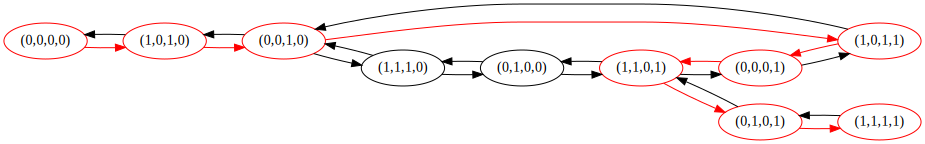

In [17]:
#Glavni program
print("PRETRAŽIVANJE U ŠIRINU - LISTE SUSJEDA SORTIRANE LEKSIKOGRAFSKI, NAĐENI (OPTIMALAN) PUT:", end = "\n\n")

oznaci_put(Graf, path2)

Dakle, na slici vidimo da smo algoritmom pretraživanja u širinu koji susjede stanja uzima **u leksikografskom uređaju**, uistinu **dobili drugo od dva moguća rješenja**. 

### Vizualizacija tijeka igre - 2. mogućnost

In [18]:
#Glavni program
print("DRUGI MOGUĆI TIJEK IGRE", end = "\n\n")

vizualizacija_tijeka_igre(path2)

DRUGI MOGUĆI TIJEK IGRE

FWGC  ||      ||      
      ||  FG  ||      
 W C  ||      ||  F G 
      ||  F   ||      
FW C  ||      ||    G 
      ||  FC  ||      
 W    ||      ||  F GC
      ||  FG  ||      
FWG   ||      ||     C
      ||  FW  ||      
  G   ||      ||  FW C
      ||  F   ||      
F G   ||      ||   W C
      ||  FG  ||      
      ||      ||  FWGC


### Pretraživanje u dubinu (DFS)

Sada ću graf pretražiti algoritmom pretraživanja u dubinu. Ovaj algoritam počinje od početnog stanja i, dok ne naiđe na ciljno stanje, za svako stanje, nakon provjere je li ono ciljno, provjerava jednog njegovog susjeda. Ukoliko stanje nema susjeda, provjerava eventualnog sljedećeg susjeda prethodno provjerenog stanja. Ukoliko ne postoji drugi susjed, provjerava eventualnog neprovjerenog susjeda stanja provjerenog prije prethodnog, itd.

Općenito, znamo da ovaj algoritam **ne pronalazi nužno rješenje**, dakle **nije poptun**, a **nije ni optimalan**, dakle, ako pronađe rješenje, **pronađeno rješenje ne mora biti optimalno**.

**Napomena 1.** <br>
Traženi redoslijed provjere stanja mogla bih dobiti tako što ću stanja koja se provjeravaju ubacivati u **last-in-last-out** strukturu (analogno kao BFS i first-in-first-out). **Raznolikosti radi**, algoritam ću implementirati korištenjem **rekurzivne** funkcije.

**Napomena 2.** <br>
**Želimo spriječiti cikluse bilo koje duljine u nađenom putu od početnog do ciljnog stanja**. Također, **želimo spriječiti da algoritam radi u beskonačnost**. Zato ću sva posjećena stanja pamtiti u nekom spremniku, ovdje skupu (set).

**Napomena 3.** <br>
Budući da radim **rekurzivni algoritam**, nađeni put se rekonstruira odmah unutar algoritma, pa **ne moram pamtiti roditelje stanja** i pozivati posebnu funkciju rekonstruiraj_put(), kao što sam kod BFS.

In [19]:
def rekurzivni_DFS(Graf, pocetak, cilj):
    
    #skup u kojem pamtim posjećena stanja
    #kako bi se sprijecili ciklusi bilo koje duljine
    visited = set()
    path = []
    
    DFS(Graf, pocetak, cilj, visited, path)
    
    if path:
        return oznaci_put(Graf, path)
    else:
        print("Rekurzivni DFS nije pronašao rješenje!")
    
    
def DFS(Graf, stanje, cilj, visited, path):
 
    visited.add(stanje)
    print(stanje, end = " ")
    if stanje == cilj:
        path.append(stanje)
    else:
        for neighbour in Graf[stanje]:
            if neighbour not in visited:
                DFS(Graf, neighbour, cilj, visited, path)
            if path:
                path.insert(0, stanje)
                break

PRETRAŽIVANJE U DUBINU

Redoslijed obilaska stabla pretraživanja:
(0, 0, 0, 0) (1, 0, 1, 0) (0, 0, 1, 0) (1, 1, 1, 0) (0, 1, 0, 0) (1, 1, 0, 1) (0, 1, 0, 1) (1, 1, 1, 1) Wall time: 2 ms


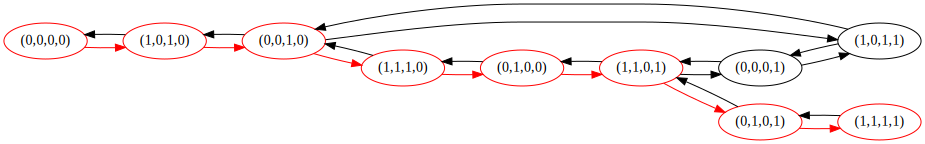

In [20]:
%%time

#Glavni program
print("PRETRAŽIVANJE U DUBINU", end = "\n\n")

print("Redoslijed obilaska stabla pretraživanja:", end = "\n") #jer će se prvo to ispisati pozivom DFS-a

#pocetno stanje - (0, 0, 0, 0), ciljno stanje - (1, 1, 1, 1)
rekurzivni_DFS(Graf, (0, 0, 0, 0), (1, 1, 1, 1))

### DFS - komentari

Vidimo da je ovaj algoritam **DFS pronašao prvo od postojeća dva rješenja**:

1.   $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 1, 1, 0) \rightarrow (0, 1, 0, 0) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$

2.    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 0, 1, 1) \rightarrow (0, 0, 0, 1) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$

**Napomena.** Pamćenjem posjećenih stanja, spriječili smo da algoritam radi u beskonačnost, pa je **očekivano da je algoritam pronašao rješenje**. Također, time smo spriječili da nađeni put ima cikluse, dakle **jedini putevi koje može naći i jesu ova dva gore navedena rješenja**. Kako su oba rješenja jednake duljine, oba su najkraća, tj. optimalna, pa **će algoritam sigurno pronaći optimalno rješenje**.

**Zašto je pronašao baš to rješenje, baš ovakvim obilaskom stanja?**

**Koje će od postojećih rješenja algoritam DFS pronaći, kao i kojim redoslijedom obilaska stanja, ovisi o redoslijedu/načinu kojim odabire jednog neposjećenog susjeda trenutno provjerenog stanja**, ili ako ih nema, jednog neposjećenog susjeda prethodno provjerenih stanja. U gornjoj implementaciji, for in-petlja listu neposjećenih susjeda nekog stanja iterira redom od prvog do zadnjeg elementa. Tim istim redom za njih rekurzivno poziva algoritam. Dakle, **redoslijed kojim ovaj DFS bira neposjećenog susjeda nekog stanja jednak je redoslijedu kojim su oni dodavani u listu pridruženu tom stanju u rječniku onda kada je graf, tj. rječnik kreiran**.

Možemo zaključiti da ukoliko bismo htjeli pokušati **algoritmom DFS dobiti drugo od gornja dva rješenja**, trebali bismo nekako promijeniti redoslijed susjeda u listama. Možemo pokušati **slučajno preurediti liste susjeda svakog stanja**.

### Pretraživanje u dubinu - liste susjeda u slučajnom poretku
 
Graf za ovaj problem očito je jednostavan. Iz samog pogleda na gore nacrtani graf, možemo vidjeti da počevši od početnog stanja, skoro svako stanje ima samo jednog susjeda (osim stanja iz kojega se došlo u njega samog, ali to je već posjećeno), pa ne moramo ni razmišljati o redoslijedu odabira susjeda. Stanje $(0, 0, 1, 0)$ i stanje $(1, 1, 0,1)$ imaju po dva susjeda različita od stanja iz kojeg se u njih došlo.

<b>Stanje $(0, 0, 1, 0)$ ima dva susjeda: $(1, 1, 1, 0)$ i $(1, 0, 1, 1)$</b>. <br>
Dakle, <b>DFS može odabrati ili susjeda $(1, 1, 1, 0)$ ili susjeda $(1, 0, 1, 1)$</b>. 

- **1.** Ukoliko DFS odabere prvo provjeriti susjeda $(1, 1, 1, 0)$: <br>
  provjerit će njegovog jedinog susjeda $(0, 1, 0, 0)$, zatim njegovog jedinog susjeda $(1, 1, 0, 1)$. <br>
  <b>Stanje $(1, 1, 0, 1)$ sada ima dva dosad neposjećena susjeda $(0, 1, 0, 1)$ i $(0, 0, 0, 1)$</b>. <br><br>
  - **1.1.** Ukoliko DFS odabere prvo provjeriti susjeda $(0, 1, 0, 1)$: <br>
    provjerit će njegovog jedinog susjeda  $(1, 1, 1, 1)$, a to je ciljno stanje. <br><br>
    Dakle, u ovom će slučaju, **redoslijed obilaska stanja** biti: <br><br>
    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 1, 1, 0) \rightarrow (0, 1, 0, 0) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$, <br><br>
    a **nađeni put** bit će: <br><br>
    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 1, 1, 0) \rightarrow (0, 1, 0, 0) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$ <br><br>
  - **1.2.** Ukoliko DFS odabere prvo provjeriti susjeda $(0, 0, 0, 1)$: <br>
    provjerit će njegovog jedinog susjeda  $(1, 1, 1, 0)$, zatim njegovog jedinog susjeda  $(1, 0, 1, 1)$. <br>
    Stanje $(1, 0, 1, 1)$ nema susjeda koji su dosad neposjećeni, pa se DFS vraća na stanje $(0, 0, 0, 1)$. <br>
    Ono također nema susjeda koji su dosad neposjećeni, pa se DFS vraća na stanje $(1, 1, 0, 1)$. <br>
    Susjed $(0, 1, 0, 1)$ stanja $(1, 1, 0, 1)$ maloprije nije posjećen, pa ga DFS sada provjerava. <br>
    Zatim će DFS provjeriti njegovog jedinog susjeda $(1, 1, 1 ,1)$, a to je ciljno stanje. <br><br>
    Dakle, u ovom će slučaju, **redoslijed obilaska stanja** biti: <br><br>
    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 1, 1, 0) \rightarrow (0, 1, 0, 0) \rightarrow (1, 1, 0, 1) \rightarrow (0, 0, 0, 1) \rightarrow (1, 0, 1, 1) \rightarrow (0, 0, 0, 1)
    \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$ <br>
    a **nađeni put** bit će: <br><br>
    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 1, 1, 0) \rightarrow (0, 1, 0, 0) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$ <br><br>
    
    
 
-  **2.** Ukoliko DFS odabere prvo provjeriti susjeda $(1, 0, 1, 1)$: <br>
  provjerit će njegovog jedinog susjeda $(0, 0, 0, 1)$, zatim njegovog jedinog susjeda $(1, 1, 0, 1)$. <br>
  <b>Stanje $(1, 1, 0, 1)$ sada ima dva dosad neposjećena susjeda $(0, 1, 0, 1)$ i $(0, 1, 0, 0)$</b>. <br><br>
  - **2.1.** Ukoliko DFS odabere prvo provjeriti susjeda $(0, 1, 0, 1)$: <br>
    provjerit će njegovog jedinog susjeda  $(1, 1, 1, 1)$, a to je ciljno stanje. <br><br>
    Dakle, u ovom će slučaju, **redoslijed obilaska stanja** biti: <br><br>
    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 0, 1, 1) \rightarrow (0, 0, 0, 1)  \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$, <br><br>
    a **nađeni put** bit će: <br><br>
    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 0, 1, 1) \rightarrow (0, 0, 0, 1) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$ <br><br>
  - **2.2.** Ukoliko DFS odabere prvo provjeriti susjeda $(0, 1, 0, 0)$: <br>
    provjerit će njegovog jedinog susjeda  $(1, 1, 1, 0)$. <br>
    Stanje $(1, 1, 1, 0)$ nema susjeda koji su dosad neposjećeni, pa se DFS vraća na stanje $(0, 1, 0, 0)$. <br>
    Ono također nema susjeda koji su dosad neposjećeni, pa se DFS vraća na stanje $(1, 1, 0, 1)$. <br>
    Susjed $(0, 1, 0, 1)$ stanja $(1, 1, 0, 1)$ maloprije nije posjećen, pa ga DFS sada provjerava. <br>
    Zatim će DFS provjeriti njegovog jedinog susjeda $(1, 1, 1 ,1)$, a to je ciljno stanje. <br><br>
    Dakle, u ovom će slučaju, **redoslijed obilaska stanja** biti: <br><br>
    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 0, 1, 1) \rightarrow (0, 0, 0, 1)  \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 0) \rightarrow (1, 1, 1, 0)  \rightarrow (0, 1, 0, 0)
    \rightarrow (1, 1, 0, 1)  \rightarrow (0, 1, 0, 1)  \rightarrow (1, 1, 1, 1)$ <br>
    a **nađeni put** bit će: <br><br>
    $(0, 0, 0, 0) \rightarrow (1, 0, 1, 0) \rightarrow (0, 0, 1, 0) \rightarrow (1, 0, 1, 1) \rightarrow (0, 0, 0, 1) \rightarrow (1, 1, 0, 1) \rightarrow (0, 1, 0, 1) \rightarrow (1, 1, 1, 1)$ <br><br>
    

Iz gornje analize, očito, za ovaj problem **postoje točno četiri mogućnosti za ponašanje algoritma DFS**, ukoliko ne znamo na koji su način liste susjeda poredane. Dakle, **ako liste susjeda svakog stanja u grafu poredamo na slučajan način, za svaki put kad to napravimo, algoritmom DFS dobit ćemo neku od ove četiri mogućnosti**.

Liste u pythonu mogu se slučajno poredati metodom shuffle() iz biblioteke random, međutim ona mijenja originalnu listu. Budući da **ne želimo da se ovdje mijenja originalno konstruirani graf**, tj. da se mijenjaju liste za ključeve u rječniku, za svako stanje ćemo listu njegovih susjeda kopirati u pomoćnu listu i zatim na toj pomoćnoj listi primijeniti metodu shuffle(). Naravno, onda ćemo neposjećene susjede stanja uzimati prolazeći po toj slučajno poredanoj listi, a ne po originalnoj.

In [21]:
from random import shuffle

In [22]:
def rekurzivni_DFS_shuffled(Graf, pocetak, cilj):
    
    visited = set()
    path = []
    
    DFS_shuffled(Graf, pocetak, cilj, visited, path)
    
    if path:
        return oznaci_put(Graf, path)
    else:
        print("Rekurzivni DFS nije pronašao rješenje!")
    
def DFS_shuffled(Graf, stanje, cilj, visited, path):
 
    visited.add(stanje)
    print(stanje, end = " ")
    if stanje == cilj:
        path.append(stanje)
    else:
    
        susjedi = Graf[stanje].copy()   #kopiramo listu susjeda u pomoćnu
        shuffle(susjedi)                #pomoćnu listu poredamo na slučajan način
        
        for neighbour in susjedi:       #susjede stanja uzimamo iz slučajno poredane liste
            if neighbour not in visited:
                DFS_shuffled(Graf, neighbour, cilj, visited, path)
            if path:
                path.insert(0, stanje)
                break
                

#### UPUTE ZA ČITATELJA

DONJU ĆELIJU **POKRENITE VIŠE PUTA** I NAKON SVAKOG POKRETANJA PROMATRAJTE DOBIVENI PUT OD POČETNOG DO CILJNOG STANJA,
ALI I ISPISANI REDOSLIJED OBILASKA STANJA.

**VRLO BRZO DOBIT ĆETE SVE ČETIRI GORE NAVEDENE MOGUĆNOSTI**.

PRETRAŽIVANJE U DUBINU - LISTE SUSJEDA U SLUČAJNOM PORETKU

Redoslijed obilaska stabla pretraživanja:
(0, 0, 0, 0) (1, 0, 1, 0) (0, 0, 1, 0) (1, 1, 1, 0) (0, 1, 0, 0) (1, 1, 0, 1) (0, 1, 0, 1) (1, 1, 1, 1) Wall time: 2 ms


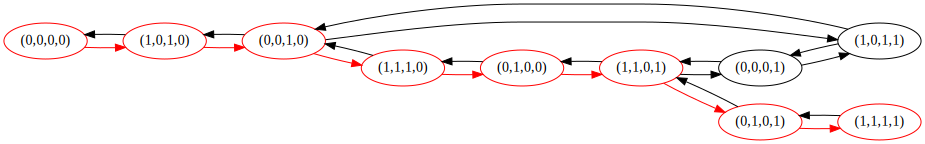

In [23]:
%%time
#Glavni program
print("PRETRAŽIVANJE U DUBINU - LISTE SUSJEDA U SLUČAJNOM PORETKU", end = "\n\n")

print("Redoslijed obilaska stabla pretraživanja:", end = "\n") #jer će se prvo to ispisati pozivom DFS-a

#pocetno stanje - (0, 0, 0, 0), ciljno stanje - (1, 1, 1, 1)
rekurzivni_DFS_shuffled(Graf, (0, 0, 0, 0), (1, 1, 1, 1))